In [20]:
import pandas as pd
import os, glob
import zipfile
import zipfile
import matplotlib.pyplot as plt


#folder= "Chicago/"
#file_list= sorted(glob.glob(folder+'/*.csv.gz'))
#file_list

#df= pd.concat([pd.read_csv('Data/Chicago/Chicago_Crime_2001-2022.zip') for f in file_list])
#df
#csv_files_path = 'info/*.csv'
#file_list = glob.glob(csv_files_path)
#file_list

#df = pd.concat([pd.read_csv(f) for f in file_list])
#df

In [2]:
# Open the ZIP file
with zipfile.ZipFile('info/Chicago_Crime_2001-2022.zip') as zf:
    file_list = zf.namelist()
    
    dfs = []
    
    for file_name in file_list:
        if file_name.endswith('.csv'):
            with zf.open(file_name) as f:
                df = pd.read_csv(f)
            dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.to_csv('combined_data.csv', index=False)

print(combined_df)

               ID                    Date        Primary Type  \
0         1326041  01/01/2001 01:00:00 AM             BATTERY   
1         1319931  01/01/2001 01:00:00 PM             BATTERY   
2         1324743  01/01/2001 01:00:00 PM            GAMBLING   
3         1310717  01/01/2001 01:00:00 AM     CRIMINAL DAMAGE   
4         1318099  01/01/2001 01:00:00 AM             BATTERY   
...           ...                     ...                 ...   
7713104  12938029  12/31/2022 12:50:00 PM             ASSAULT   
7713105  12937822  12/31/2022 12:50:00 PM             ASSAULT   
7713106  12937583  12/31/2022 12:52:00 AM             BATTERY   
7713107  12938420  12/31/2022 12:52:00 PM             ASSAULT   
7713108  12939906  12/31/2022 12:59:00 PM  DECEPTIVE PRACTICE   

                                     Description  \
0                                         SIMPLE   
1                                         SIMPLE   
2                            ILLEGAL ILL LOTTERY   
3          

In [3]:
df= pd.read_csv('combined_data.csv')
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
7713104,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
7713105,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
7713106,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
7713107,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


In [11]:
df['Date Only'] = df.index.date
df["Date Only"] = df["Date Only"].astype(str)


df['HourOfDay'] = df.index.hour
df['Year']  = df.index.year
df['Month']  = df.index.month
df['DayOfWeek'] = df.index.day_name()

In [12]:
df= df.set_index('Date Only')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,HourOfDay,Year,Month,DayOfWeek
Date Only,,,,,,,,,,,,,,,
2001-01-01,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1,2001,1,Monday
2001-01-01,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,13,2001,1,Monday
2001-01-01,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,13,2001,1,Monday
2001-01-01,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1,2001,1,Monday
2001-01-01,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1,2001,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,12,2022,12,Saturday
2022-12-31,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,12,2022,12,Saturday
2022-12-31,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,0,2022,12,Saturday


In [13]:
#Topic 1) Comparing Police Districts
## Which district had the most crimes in 2022? 
## Which had the least?

crime= df['District'].value_counts().sort_values(ascending=True)
crime

21.0         4
31.0       236
20.0    136112
17.0    222523
24.0    232700
22.0    252722
16.0    257949
14.0    298794
1.0     310778
15.0    331469
10.0    332395
5.0     342118
18.0    345666
19.0    345934
2.0     364725
9.0     377311
12.0    381247
3.0     391059
4.0     437746
25.0    439160
7.0     447273
6.0     450645
11.0    495947
8.0     518549
Name: District, dtype: int64

In [31]:
arrests_per_yr = df.groupby('Year')['Arrest'].sum()
arrests_per_yr

Year
2001    141934
2002    141565
2003    141588
2004    144704
2005    140925
2006    135420
2007    131881
2008    110015
2009    110829
2010    100546
2011     96289
2012     90673
2013     86554
2014     79643
2015     70041
2016     53029
2017     52648
2018     53872
2019     56218
2020     34100
2021     26346
2022     27730
Name: Arrest, dtype: int64

<Axes: title={'center': 'Crimes Across the Years'}, xlabel='Year', ylabel='Number of Arrests'>

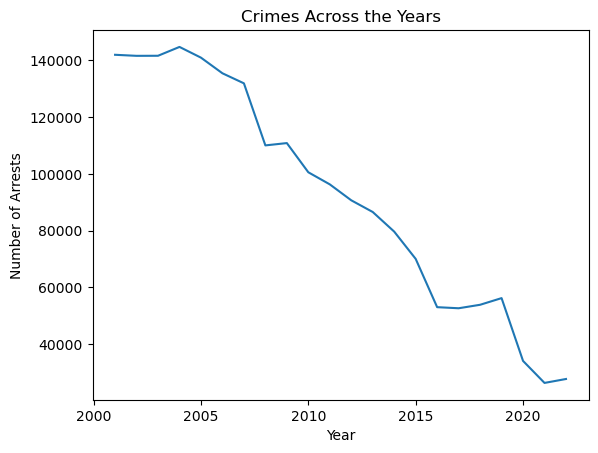

<Figure size 1000x600 with 0 Axes>

In [32]:
#Topic 2) Crimes Across the Years

## Is the total number of crimes increasing or decreasing across the years?
## Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

df_ts = arrest_per_yr.plot(xlabel='Year', ylabel='Number of Arrests', title='Crimes Across the Years')

plt.figure(figsize=(10, 6))
df_ts

In [33]:
# the number of crimes seem to be going down based on the number of arrests

In [37]:
domestic_per_yr = df.groupby('Year')['Domestic'].sum()
domestic_per_yr

Year
2001    77504
2002    82586
2003    76582
2004    75017
2005    70717
2006    69202
2007    70425
2008    69350
2009    65260
2010    61361
2011    58228
2012    55541
2013    52030
2014    47496
2015    48942
2016    50772
2017    50448
2018    51786
2019    51154
2020    46230
2021    47795
2022    44849
Name: Domestic, dtype: int64

<Axes: title={'center': 'Domestic Cases Across the Years'}, xlabel='Year', ylabel='Number of Cases'>

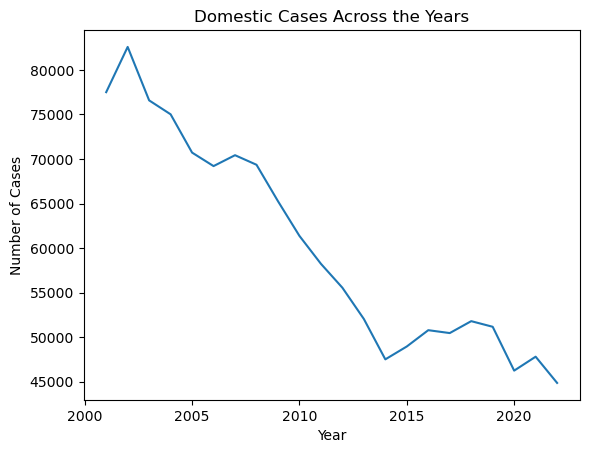

<Figure size 1000x600 with 0 Axes>

In [39]:
df_ts = domestic_per_yr.plot(xlabel='Year', ylabel='Number of Cases', title='Domestic Cases Across the Years')

plt.figure(figsize=(10, 6))
df_ts

In [36]:
beat_per_yr = df.groupby('Year')['Beat'].sum()
beat_per_yr

Year
2001    595888814
2002    594515174
2003    577403854
2004    566610518
2005    549141279
2006    538720030
2007    522269750
2008    512846798
2009    475594319
2010    449204498
2011    422841765
2012    391516514
2013    353842061
2014    315126377
2015    302930077
2016    309663732
2017    308272224
2018    307258478
2019    297247769
2020    243165466
2021    240351370
2022    275603064
Name: Beat, dtype: int64

<Axes: title={'center': 'Beatings Across the Years'}, xlabel='Year', ylabel='Number of Beatings'>

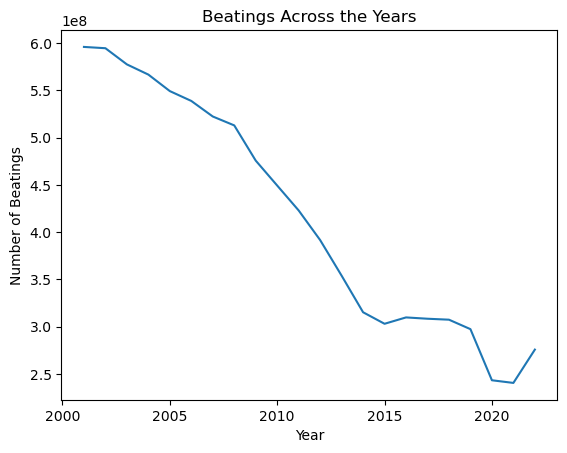

<Figure size 1000x600 with 0 Axes>

In [40]:
df_ts = beat_per_yr.plot(xlabel='Year', ylabel='Number of Beatings', title='Beatings Across the Years')

plt.figure(figsize=(10, 6))
df_ts

In [41]:
# From the last two graphs we can see that there is a downward trend in the crimes 

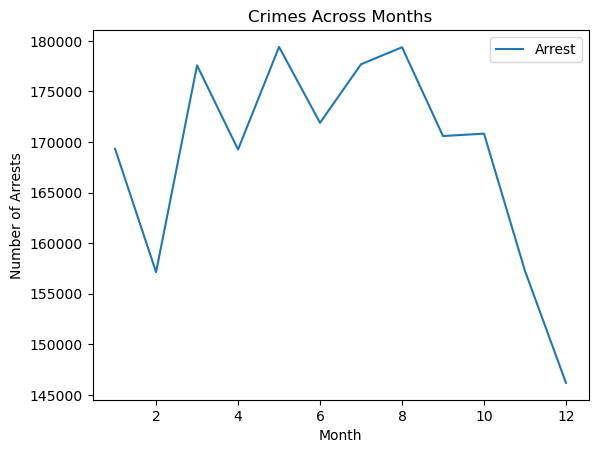

In [47]:
#Topic 4) Comparing Months

## Answer the question: ​What months have the most crime? What months have the least?
## Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

arrests_per_month = df.groupby('Month')[['Arrest']].sum()

df_month = arrests_per_month.plot(xlabel='Month', ylabel='Number of Arrests', title='Crimes Across Months')

In [ ]:
# from the graph, we can see that December has the least crime and May has the most crime